In [99]:
import numpy as np
import math
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [100]:
#Given Parameters
m_s = 50 #Weight of the rocket shell (kg)
g = 9.81 #Acceleration due to gravity (m/s^2)
rho = 1.091 #Average Air Density (kg/m^3) (assume constant throughout flight)
r = 0.5 #Maximum radius of rocket shell (m)
A = math.pi*(r)**2 # Maximum cross-sectional area of the rocket (m^2)
v_e = 325 #Exhaust Speed (m/s)
c_d = 0.15 #Coefficient of Drag
m_p0 = 100 #Initial Weight of the Rocket Propellant (kg)

#Building Time Step Array
T = 100 #Define final value of array, duration of study, T=time_final
dt = 0.1 #timestep for Euler's method
N = int(T/dt) + 1 #Calculate number of time steps
t = np.linspace(0, T, N) #Time array build

#From provided plot of propellant burn rate versus time...
dm_1 = 20 #Propellant Burn Rate (t=0s --> t=5s)
dm_2 = 0  #Propellant Burn Rate (t>5s)

#Study rocket from launch until crash down
v0 = 0.0 #Initial velocity, at rest
h0 = 0.0 #Initial altitude, pre-launch

In [101]:
def f(u,dm,t_c):
    """
    Returns the right-hand side of system of equations
    Differential approximation for initial propellant burn (dm_1)
    
    Parameters:
    u[0] = h
    u[1] = v
    v = velocity of rocket
    dm = propellant burn rate, change in mass
    t_c = current time
    """
    v=u[1]
    m_p=m_p0-dm*t_c
    
    return np.array([v,(v_e*dm-(m_s+m_p)*g-0.5*rho*v*abs(v)*A*c_d)/(m_s+m_p)])

In [102]:
def f2(u,dm):
    """
    Returns the right-hand side 
    Parameters:
    v = velocity of rocket
    Q = propellant burn rate
    t_c = current time
    """
    v=u[1]
    m_p=0 #mass of remaining propellant
    
    return numpy.array([v,(v_e*dm-(m_s+m_p)*g-0.5*density*v*abs(v)*A*c_d)/(m_s+m_p)])

In [103]:
def euler_step(u,f,dt):
    """Returns the solution at the next time-step using Euler's method.
    Parameters:
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equations.
    dt : float
        time-increment.
    Returns:
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    return u+dt*f

In [104]:
#Building two row array and populating with starting conditions and N additional height and velocity values
#Zeroth Row--Altitude Position
#First Row--Rocket Velocity

u=numpy.empty((N,2))
u[0]=numpy.array([h0,v0])

for i in range(N-1):
    if (t[i]<5):
        F=f(u[i],dm_1,t[i])
        u[i+1] = euler_step(u[i],F,dt)
    if (t[i] >= 5):
        F=f2(u[i],dm_2)
        u[i+1]=euler_step(u[i],F,dt)

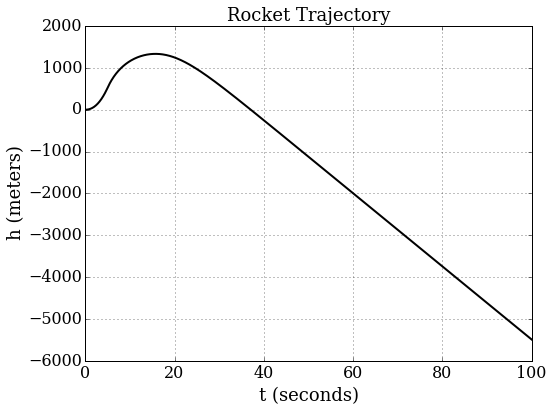

In [105]:
#Plotting the Trajectory of the Rocket During Flight
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r't (seconds)', fontsize=18)
pyplot.ylabel(r'h (meters)', fontsize=18)
pyplot.title('Rocket Trajectory', fontsize=18)
pyplot.plot(t,u[:,0], 'k-', lw=2);

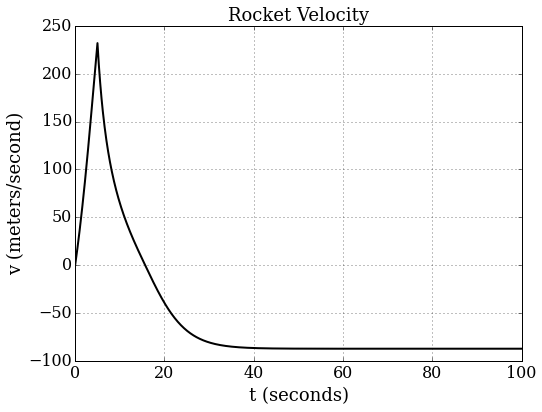

In [106]:
#Plotting the Velocity of the Rocket During Flight
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r't (seconds)', fontsize=18)
pyplot.ylabel(r'v (meters/second)', fontsize=18)
pyplot.title('Rocket Velocity', fontsize=18)
pyplot.plot(t,u[:,1], 'k-', lw=2);

In [107]:
#Remaining Fuel after t_r seconds
t_r=3.2 #seconds
m_p_r=m_p0-(dm_1*(t_r-0)-dm_2*(t_r-0))
print m_p_r,'seconds'

36.0 seconds


In [110]:
#Maximum Velocity
print max(u[:,1]),'meters/second'

t_c_v=np.where(u[:,1]==max(u[:,1]))
#When does this occur? (time)
print t[t_c_v],'seconds'
#Where does this occur? (altitude)
print u[t_c_v,0],'meters'

232.106133413 m/s
[ 5.] seconds
[[ 523.52283429]] meters


In [115]:
#Maximum Height
print max(u[:,0]),'meters'

t_c_h=np.where(u[:,0]==max(u[:,0]))
#When does this occur? (time)
print t[t_c_h],'seconds'
#What is the recorded velocity at this time step? (meters/second)
print u[t_c_h,1],'meters/second'

1334.18294543 meters
[ 15.7] seconds
[[-0.22067692]] meters/second


In [168]:
#IMPACT (Check all values of altitude, output array position of first instance of negative altitude as "i"
for i in range(len(t)):
    if u[i,0]<0:
        break
impact=i-1 #find frame just before impact
#What time does the rocket impact the ground?
print t[impact],'seconds'
#What is the velocity of the rocket at time of impact?
print u[impact,1],'meters/second'
#What is the actual altitude at this time step?
print u[impact,0],'meters'

37.0 seconds
-85.9759134804 meters/second
6.13901004188 meters


In [169]:
#Info just after "impact"
print t[i],'seconds'
print u[i,1],'meters/second'
print u[i,0],'meters'

37.1 seconds
-86.0068349838 meters/second
-2.45858130616 meters
